In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np
warnings.filterwarnings("ignore")


wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Αρχικά παρατηρούμε πως έχουμε 178 δείγματα και 13 αριθμητικά χαρακτηριστικά τα οποία αναγράφονται παρακάτω. Επίσης τα δεδομένα μας δεν έχουν κανένα null value.

In [ ]:
print(X.shape,'\n')
print(wine.feature_names,'\n')
print(df.info())

(178, 13) 

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity  

Με την παρακάτω εντολή, βλέπουμε ορισμένες βασικές ιδιότητες για τις κατανομές  των χαρακτηριστικών μας. Παρατηρούμε επίσης πως στην πλειοψηφία τους, τα max vales και τα 75% quantiles καθώς και τα 25% quantiles και min values έχουν αρκετά μεγάλη διαφορά, ενώ σε αντίθεση οι μέσες τιμές και τα 50% quantiles(medians) είναι σχεδόν ίσα.

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Με το correlation heatmap βλέπουμε μεγάλη συσχέτιση στα παρακάτω χαρακτηριστικά 1) total_phenols & flavoroids 2)flavonoids & od280/od315_of_diluted_wines 3) od280/od315_of_diluted_wines & total phenols

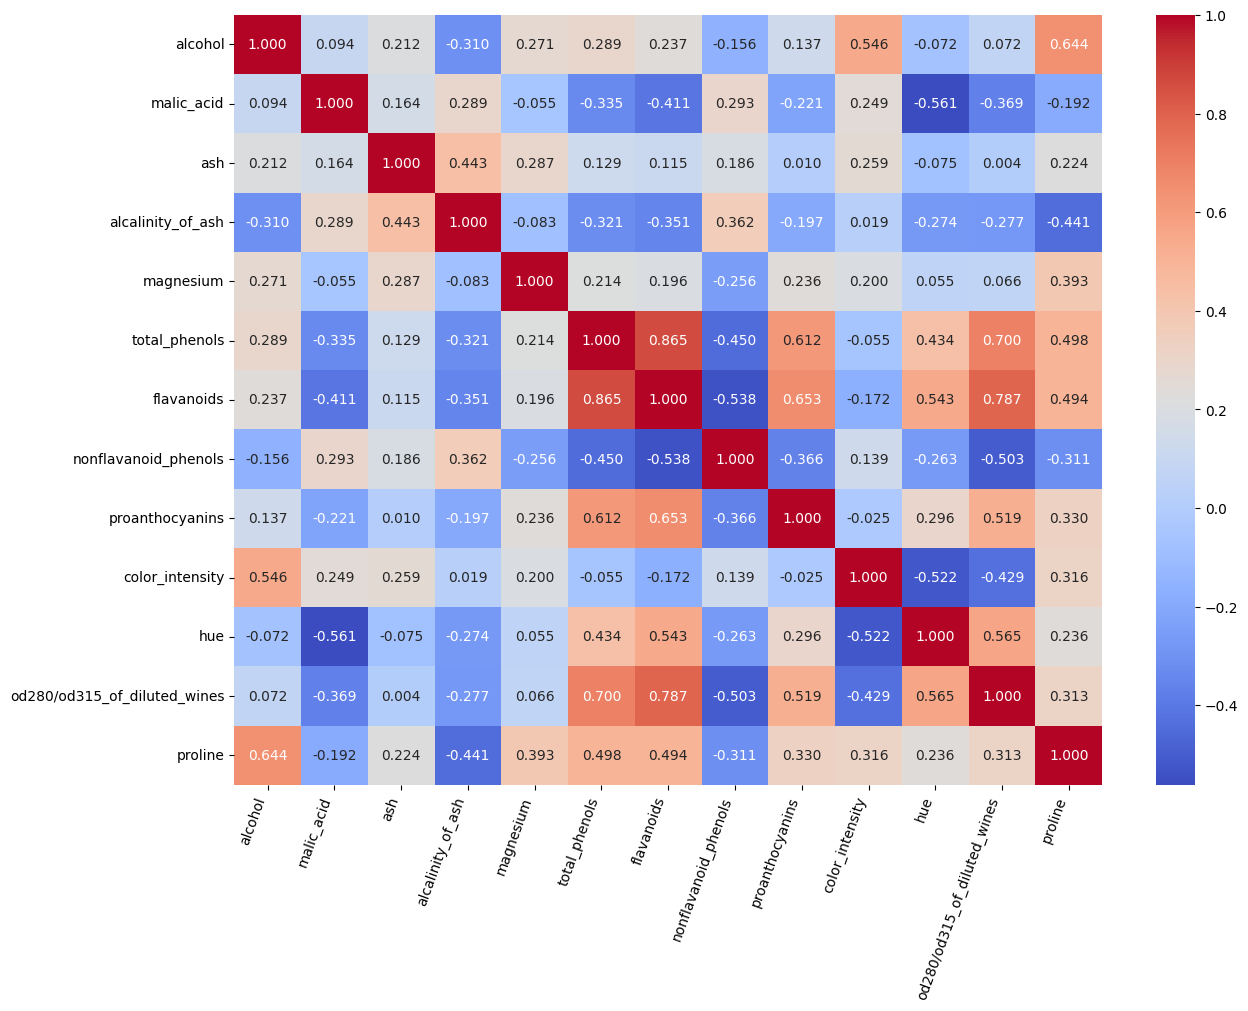

In [ ]:
corr=df.corr()
%matplotlib inline
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.3f')
plt.xticks(rotation=70,ha='right')
plt.show()

Συνεχίζουμε με το να εξετάσουμε το είδος των κατανομών για τα χαρακτηριστικά μας. Από τα ιστογράμματα βλέπουμε πως ορισμένα χαρακτηριστικά όπως τα ash, alcalinity_of_ash, alcohol έχουν πιο συμμετρικές κατανομές που προσεγγίζουν την κανονική, ενώ σε μεγάλη πλειοψηφία βλέπουμε positively skewed κατανομές όπως πχ για τα χαρακτηριστικά malic_acid, magnesium και color intensity

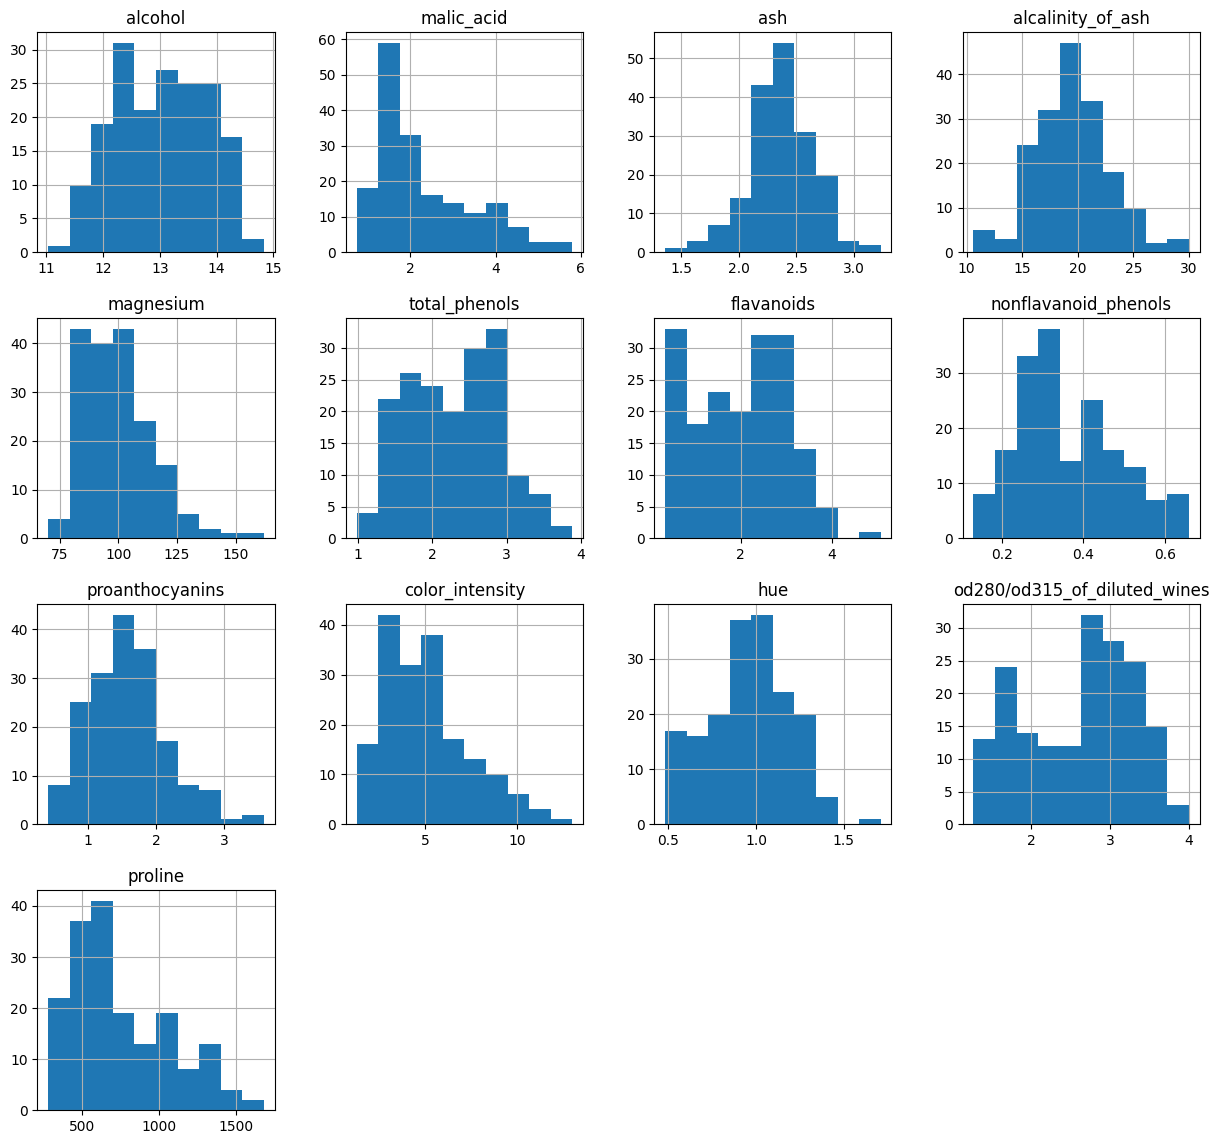

In [ ]:
df.hist(bins=10, figsize=(15, 14))
plt.show()

Με τα boxplots βλέπουμε πως τα χαρακτηριστικά malic_acid, acid, alcalinity_of_ash, magnesium, proanthocyanins, color_intensity, hue έχουν outliers

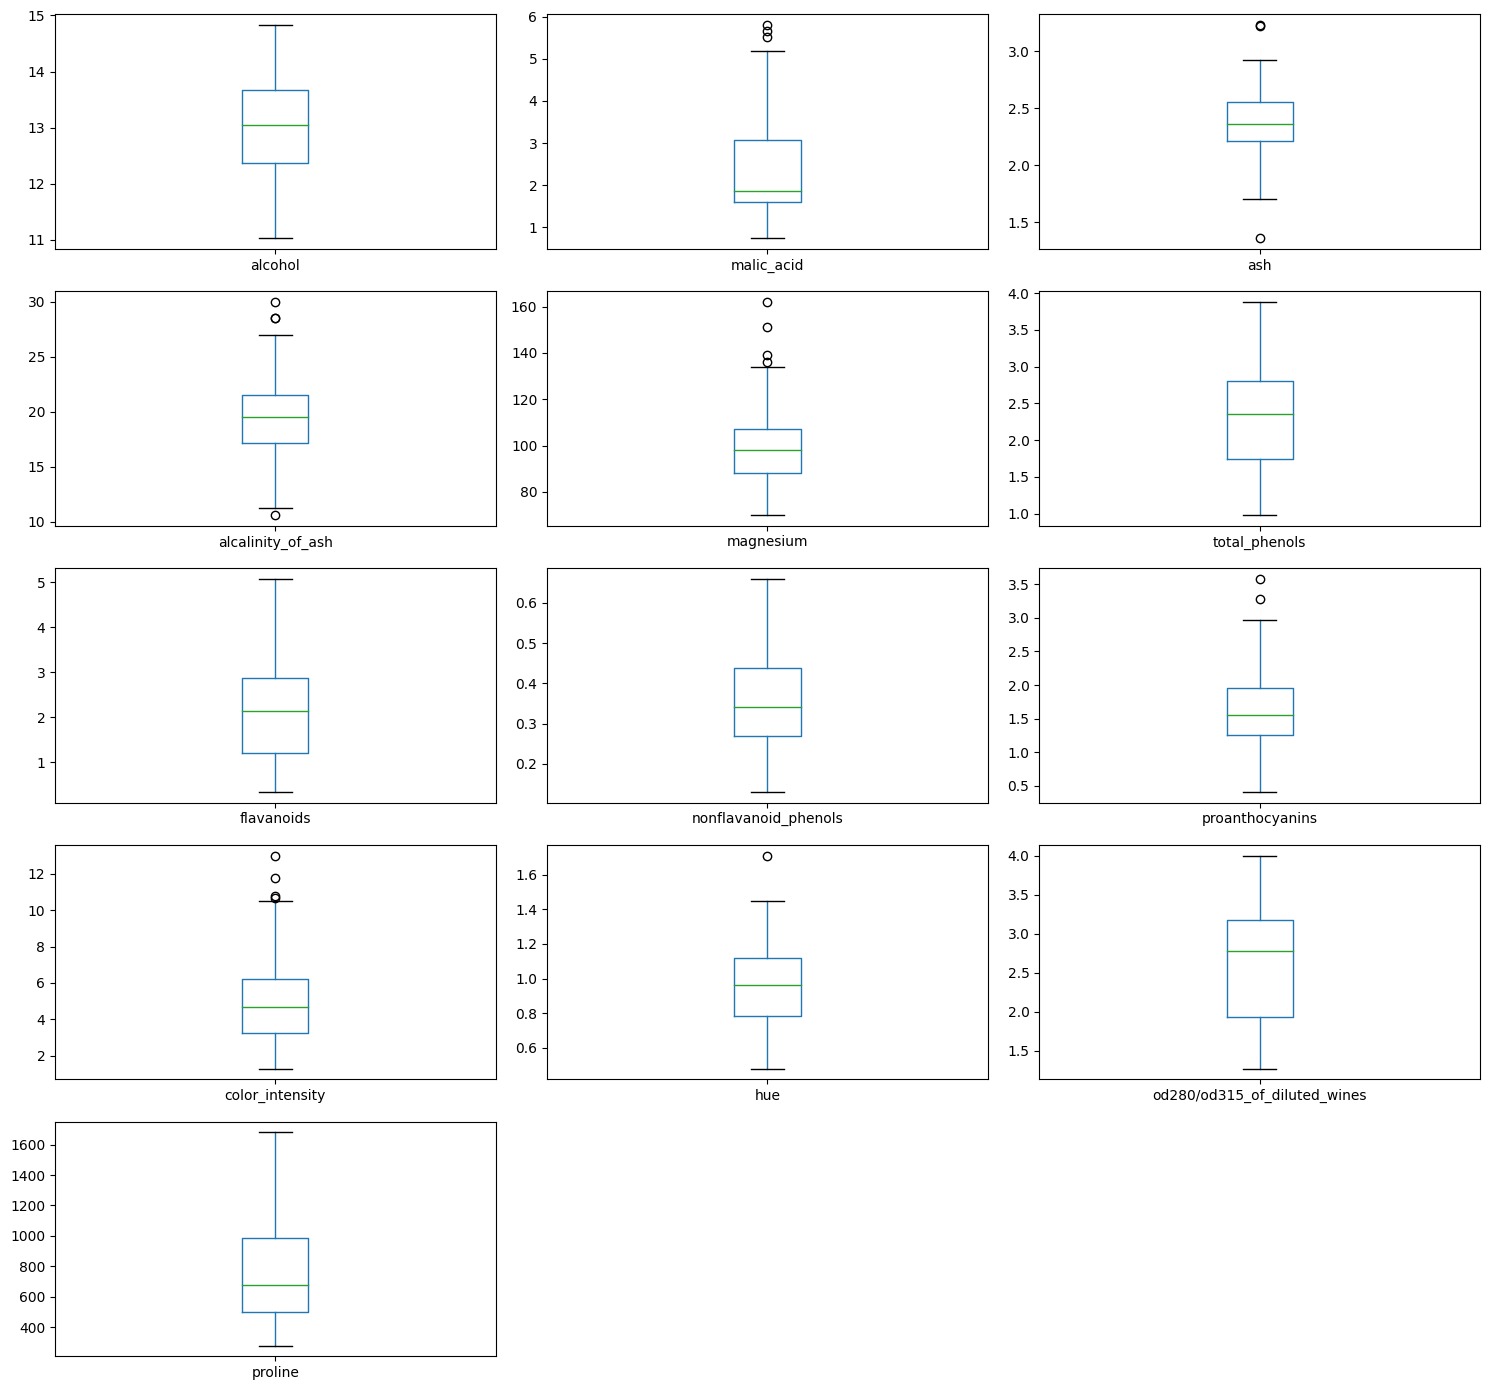

In [ ]:
plt.figure(figsize=(15,14))
for i,col in enumerate(list(df.columns.values)):
  plt.subplot(5,3,i+1)
  df.boxplot(col)
  plt.grid()
  plt.tight_layout()



Για να κανονικοποιήσουμε τα δεδομένα μας χρησιμοποιούμε robust scaler ο οποίος είναι ανθεκτικός στα outliers (που όπως είδαμε τα περισσότερα χαρακτηριστικά μας έχουν). Προχωρώντας στη μείωση των διαστάσεων, γίνεται χρήστη PCA. Για να αποφασίσουμε για τον αριθμό των principal components που θα κρατήσουμε κοιτάμε αρχικά το διάγραμμα explained variance vs dimensions. Βλέπουμε πως κάπου στα 7-8 dimensions και μετά υπάρχει πολύ μικρή θετική κλίση. Με εναν περαιτέρω έλεγχο βλέπουμε πως με 7 dimensions έχουμε οριακά 90% explained variance. Θα επιλέξουμε επομένως 7 principal components για το pca.

In [ ]:
scaler=RobustScaler()
scaled_data=scaler.fit_transform(X)

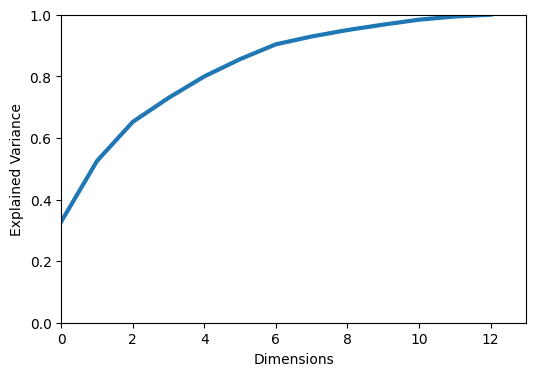

In [ ]:

pca=PCA()
pca.fit(scaled_data)
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 13, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.show()

In [ ]:
pca = PCA(n_components=7)
X_reduced = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_.sum()

0.9039252472402621

# **K-MEANS ΒΑΣΙΣΜΕΝΟ ΣΤΗΝ INTERTIA**

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

print(inertias)

[1038.2375321626494, 744.5399042835174, 566.9195589887684, 514.8552001359011, 473.73415056234586, 444.1523633834765, 412.5700337598631, 387.6912044988586, 358.54004275639636]


  Κοιτώντας το παρακάτω διάγραμμα Inertia vs Clusters, το elbow point φαίνεται να είναι το 3.

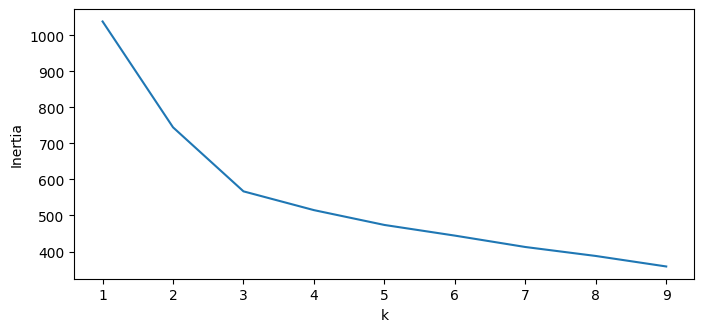

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

Ο κατάλληλος αριθμός clusters από το elbow point στο διάγραμμα είναι 3. Το ίδιο παρατηρούμε κοιτώντας και το διάγραμμα sihlouette scores vs k.

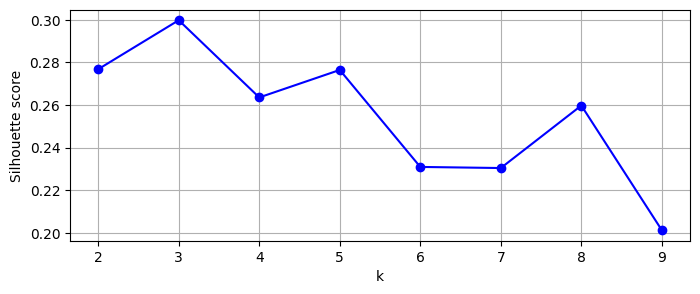

In [ ]:
silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette score")


plt.grid()
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=42,n_init=10)
kmeans_model.fit(X_reduced)


KMeans(n_clusters=3, n_init=10, random_state=42)

Για να απεικονίζουμε τα αποτελέσματα μας, θα χρησιμοποιήσουμε τα πρώτα 2 principal components καθώς δεν είναι εφικτό να κάνουμε γραφική αναπαράσταση στις 8 διαστάσεις που είμαστε. Βλέπουμε πως τα αποτελέσματα είναι αρκετά καλά, παρ΄όλα αυτά υπάρχουν και μερικά δείγματα τα οποία μπορεί να έχουν τοποθετηθεί στην λάθος συστάδα, καθώς βρίσκονται στα σύνορα μεταξύ 2 συστάδων.

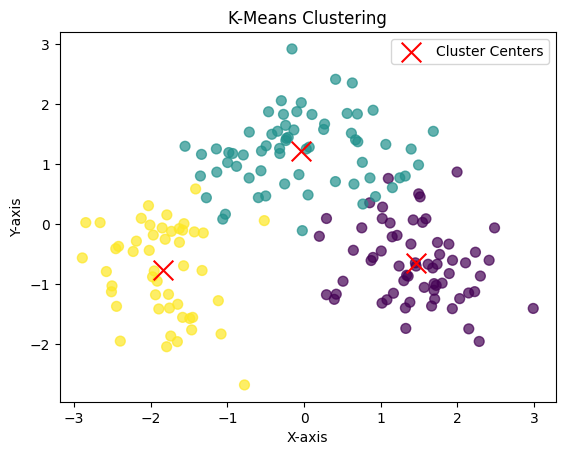

In [ ]:
centers = kmeans_model.cluster_centers_
labels = kmeans_model.labels_


plt.scatter(X_reduced[:, 0], X_reduced[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### 5. Hierarchical Agglomerative Clustering (HAC)

5α. Δημιουργία μοντέλου HAC με 3 clusters


In [ ]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X_reduced)

AgglomerativeClustering(n_clusters=3)

Πάλι για να απεικονίσω γραφικά τα αποτελέσματα μου θα χρησιμοποιήσω μόνο τα πρώτα 2 principal components

In [ ]:
clustering.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

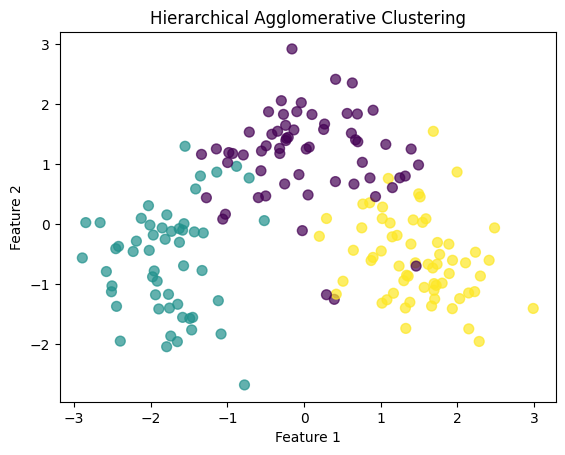

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clustering.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

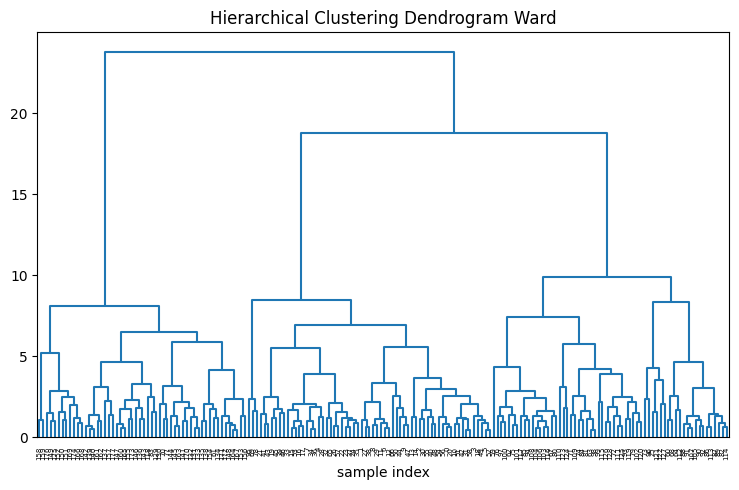

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_reduced, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram Ward')
plt.xlabel('sample index')
plt.tight_layout()

Γραφικά φαίνονται καλύτερα τα αποτελέσματα του kmeans για 3 clusters, καθώς με τον αλγόριθμο HAC βλέπουμε πως υπάρχει μεγάλο ποσοστό λανθασμένης συσταδοποίησης. Αναφορικά με την επιλογή των clusters φαίνεται να είναι η βέλτιστη καθώς τόσο το sihlouette score όσο και το dendrogram υποδεικνύουν αυτό. Συγκεκριμένα, στο dendrogram φαίνεται πως την μεγαλύτερη απόσταση έχουν τα 3 clusters που εμφανίζονται αριστερά στην μέση και δεξία για αυτό και προχωράμε με αυτή την επιλογή.

Για να αξιολoγήσουμε την απόδοση των αλγορίθμων και να συγκρίνουμε μεταξύ τους έχωντας τα true labels θα χρησιμοποιήσουμε τα εξής κριτήρια. 1)Adjusted rand index το οποίο εξετάζει  κατα πόσο τα predicted clusters και τα true labels συμφωνούν, παίρνωντας όμως υπόψιν και τον παράγοντα της τύχης στην ομοιότητα των παραπάνω. 2)Normalized Mutual Information το οποίο υπολογίζει το mutual information ανάμεσα σε 2 clusters και το κανονικοποιεί με τη ρίζα του γινομένου της εντροπίας κάθε cluster. 3)Fowlkes-Mallows Index το οποίο υπολογίζει την ποιότητα των αποτελεσμάτων του clustering κάνοντας χρήστη των true labels, με τα True positives, false positives & false negatives

Βλέπουμε πως βάση των παραπάνω κριτηρίων, τα αποτελέσματα του αλγορίθμου kmeans με 3 clusters είναι όντως καλύτερα σε κάθε κριτήριο.

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
cluster_predictions=clustering.labels_


ari_score = adjusted_rand_score(y, cluster_predictions)
nmi_score = normalized_mutual_info_score(y, cluster_predictions)
fmi_score = fowlkes_mallows_score(y, cluster_predictions)

print(f"Adjusted Rand Index: {ari_score}")
print(f"Normalized Mutual Information: {nmi_score}")
print(f"Fowlkes-Mallows Index: {fmi_score}")

Adjusted Rand Index: 0.8023860882405826
Normalized Mutual Information: 0.7820643445847418
Fowlkes-Mallows Index: 0.8685233102938371


In [ ]:
cluster_predictions=kmeans_model.labels_


ari_score = adjusted_rand_score(y, cluster_predictions)
nmi_score = normalized_mutual_info_score(y, cluster_predictions)
fmi_score = fowlkes_mallows_score(y, cluster_predictions)

print(f"Adjusted Rand Index: {ari_score}")
print(f"Normalized Mutual Information: {nmi_score}")
print(f"Fowlkes-Mallows Index: {fmi_score}")

Adjusted Rand Index: 0.8950582389649661
Normalized Mutual Information: 0.8820653444077604
Fowlkes-Mallows Index: 0.9303622792173031


 Ensemble Methods

### 1. Εισαγωγή απαραιτήτων βιβλιοθηκών και συνόλου δεδομένων

In [ ]:
!pip install shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from xgboost import plot_importance
import shap


data = load_breast_cancer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.1 MB/s eta 0:00:00


Πριν ξεκινήσουμε το EDA μετατρέπουμε τα δεδομένα μας σε dataframe για διευκόλυνση.

In [ ]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Εχουμε 569 δείγματα και 30 χαρακτηριστικά (31-1 καθώς δεν μετράμε το target). Όλα τα χαρακτηριστικά μας είναι αριθμητικά και δεν έχουμε κανένα missing value.

In [ ]:
print(df.shape)
print(df.info())

(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

Από το correlation heatmap, βλέπουμε πως είναι πάρα πολλά τα χαρακτηριστικά που έχουν μεγάλη συσχέτιση μεταξύ τους και επομένως σίγουρα θα χρειαστεί να προχωρήσουμε παρακάτω σε μείωση διαστάσεων.

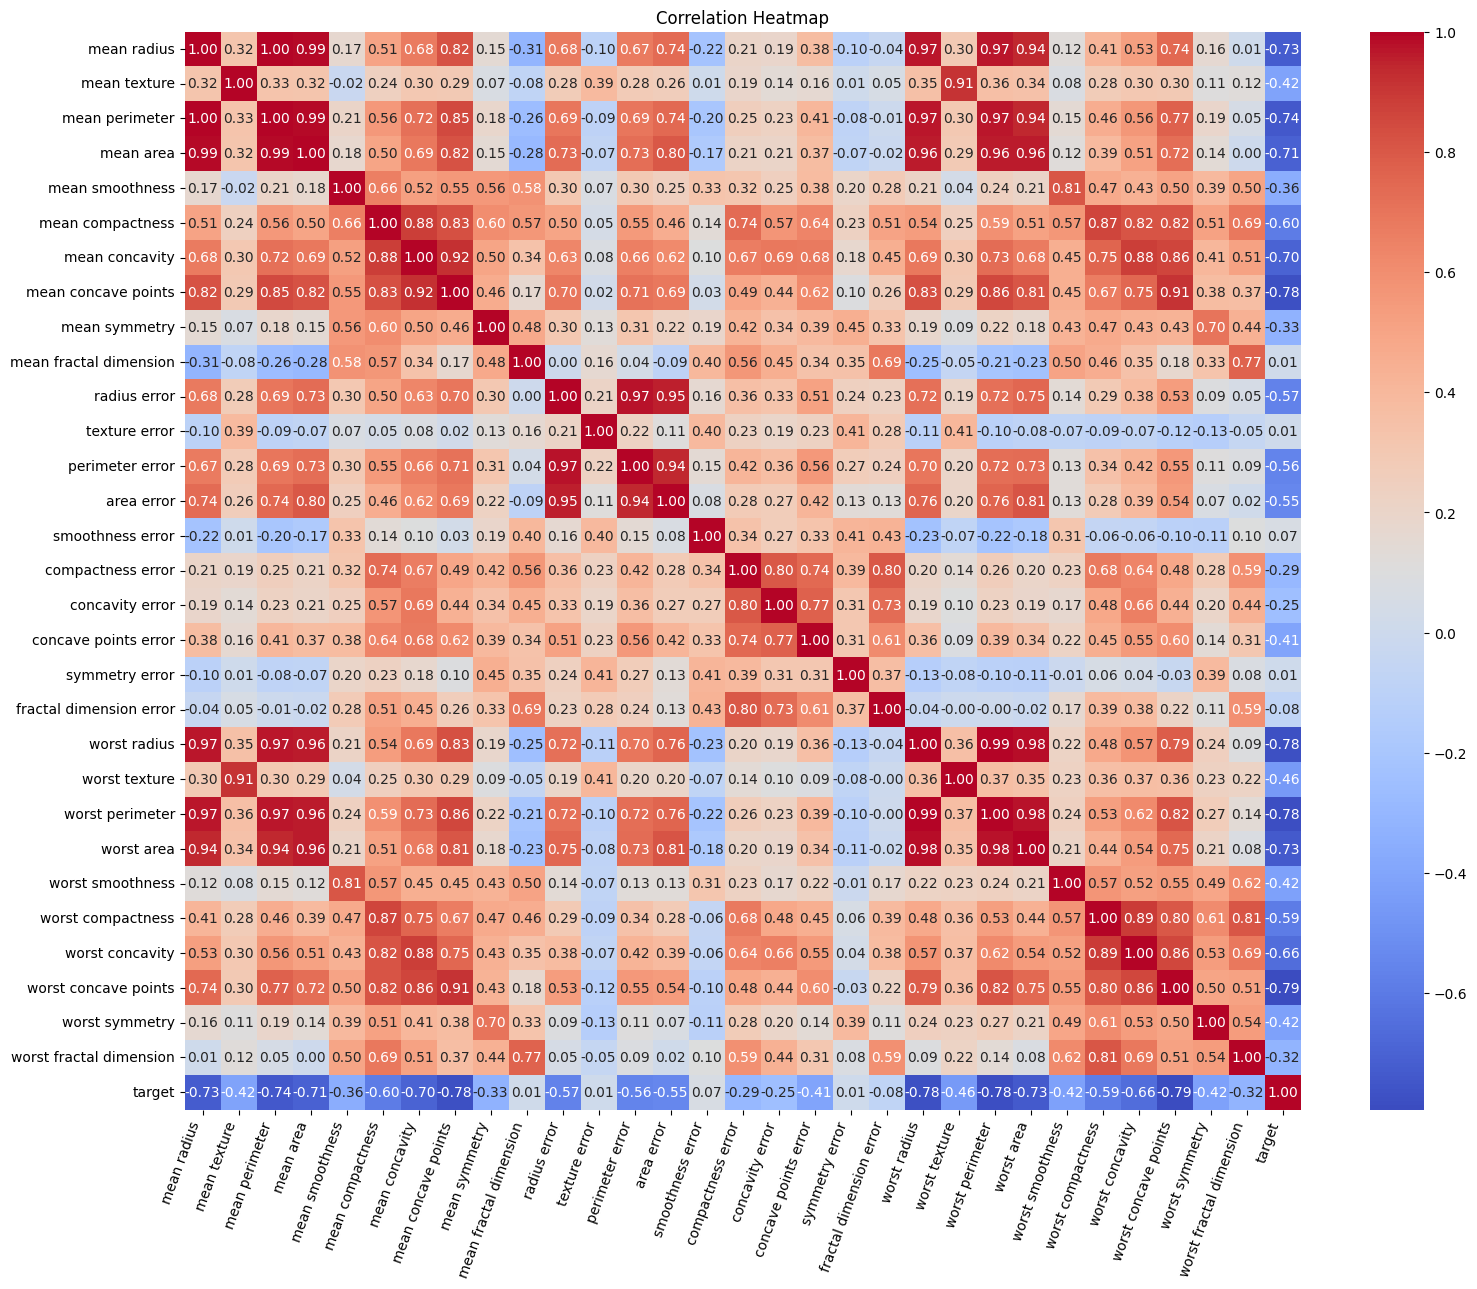

In [ ]:
correlation=df.corr(numeric_only=True)
%matplotlib inline
plt.figure(figsize=(18,14))
plt.title('Correlation Heatmap')
sns.heatmap(correlation, annot=True, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=70, ha='right')
plt.yticks()
plt.show()

Οι κατανομές των χαρακτηριστικών βάση των παρακάτω ιστογραμμάτων φαίνεται πως είναι είτε συμμετρικές όπως πχ για τα mean_texture, mean_symmetry & worst_smoothness και σε μεγάλη πλειοψηφία positively skewed πχ mean area, mean compactness κτλπ.

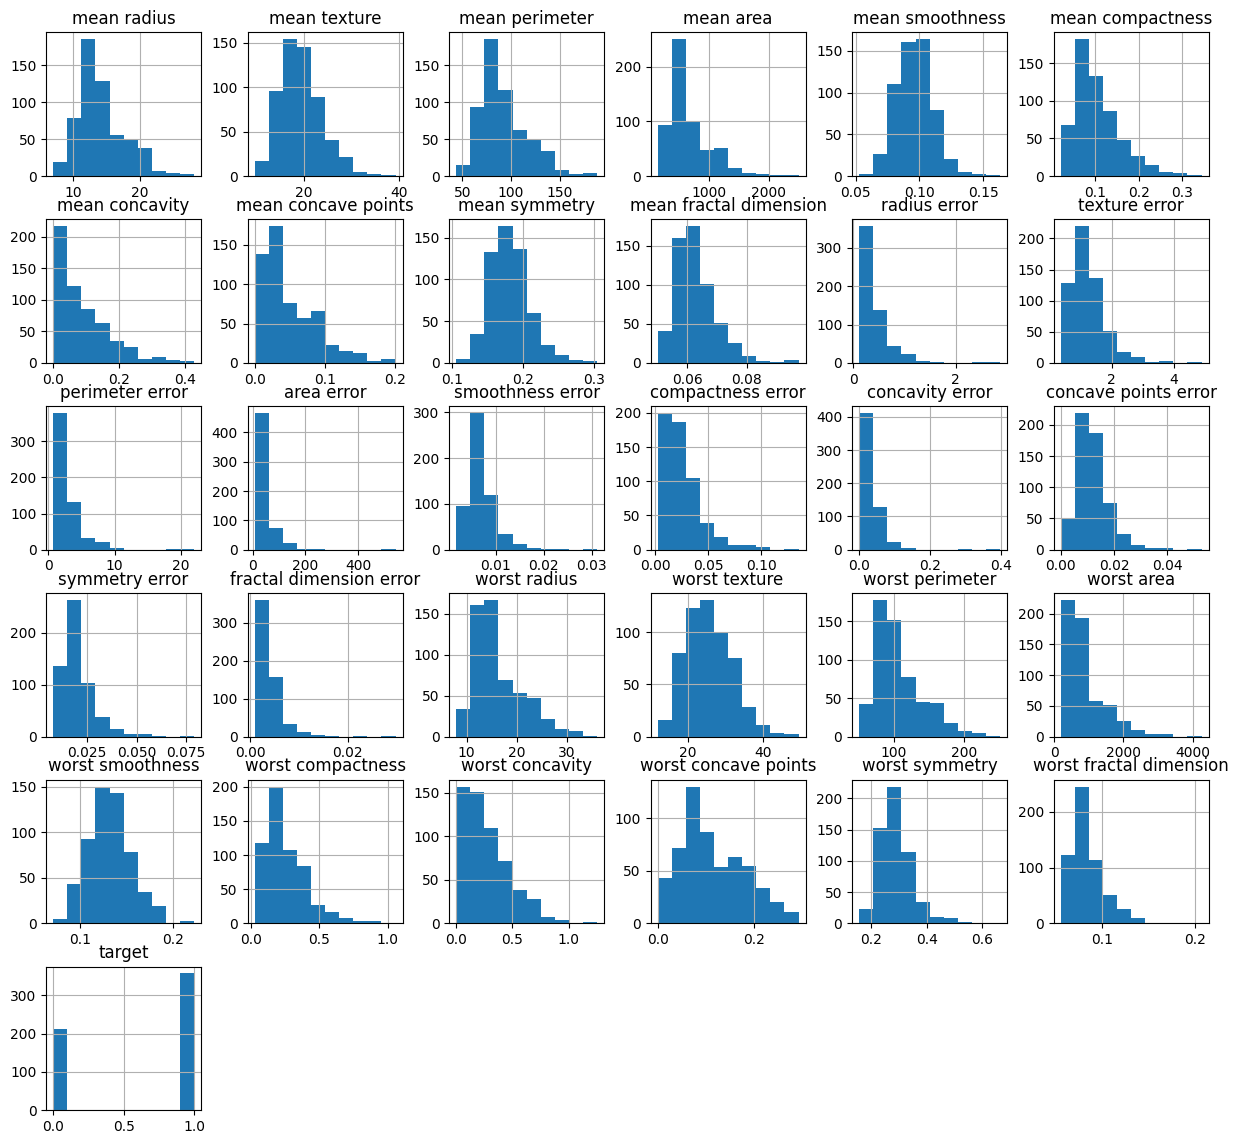

In [ ]:
df.hist(bins=10, figsize=(15, 14))
plt.show()

Από τα 569 δείγματα τα 357 έχουν target value 1 και τα υπόλοιπα 212 target 0. Επομένως βλέπουμε πως το dataset είναι ελαφρώς unbalanced.

In [ ]:
(df['target']==1).sum()

357

Επιπλέον, με τον παρακάτω κώδικα βλέπουμε πως σε όλα τα χαρακτηριστικά έχουμε outliers.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print(outliers)

mean radius                14
mean texture                7
mean perimeter             13
mean area                  25
mean smoothness             6
mean compactness           16
mean concavity             18
mean concave points        10
mean symmetry              15
mean fractal dimension     15
radius error               38
texture error              20
perimeter error            38
area error                 65
smoothness error           30
compactness error          28
concavity error            22
concave points error       19
symmetry error             27
fractal dimension error    28
worst radius               17
worst texture               5
worst perimeter            15
worst area                 35
worst smoothness            7
worst compactness          16
worst concavity            12
worst concave points        0
worst symmetry             23
worst fractal dimension    24
target                      0
dtype: int64


### 3. Προεπεξεργασία συνόλου δεδομένων

Για την κανονικοποίηση των δεδομένων μου χρησιμοποιώ robust scaler γιατί όπως είδαμε έχουμε αρκετά outliers. Για τη μείωση των διαστάσεων θα χρησιμοποιήσω pca. Από το διάγραμμα explained variance vs dimensions βλέπουμε πως στα 7-10 dimensions η κλίση γίνεται πολύ μικρή. Με 7 dimensions διατηρούμε παραπάνω από 91% explained variance, επομένως θα προχωρήσουμε με pca με 7 principal components.

In [ ]:
scaler=RobustScaler()
scaled_data=scaler.fit_transform(df)

In [ ]:
X=scaled_data[:,:-1]
y=data.target

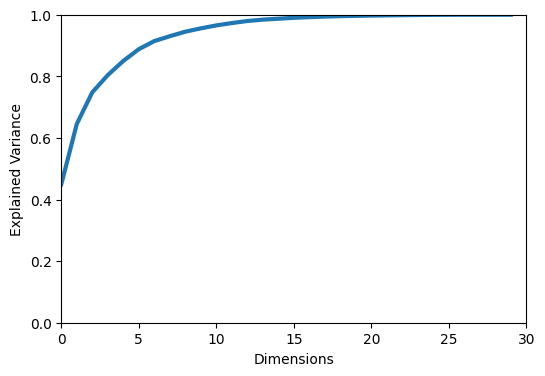

In [ ]:
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.show()

In [ ]:
pca=PCA(n_components=7)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.9144297437523177

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_reduced,y,test_size=0.3,random_state=42)

### 5. Εκπαίδευση μοντέλων και εύρεση βέλτιστων υπερπαραμέτρων


-  AdaBoost Model
-  Gradient Boosting Model
-  XGBoost Model




In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

ada_model=AdaBoostClassifier(random_state=42)
gb_model=GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

param_grid_ada= {
        'n_estimators' :[50, 100, 150, 200],
        'learning_rate':[0.01, 0.1, 0.5, 1]
        }

param_grid_gb = {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'max_depth': [2, 3, 4, 5],
        'min_samples_split': [2,4,6,8,10],
        'min_samples_leaf': [1,3,5]
        }

param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.3, 1],
    'max_depth': [2,4,6,8],
    'gamma':[0,0.001,0.01]
       }

grid_ada = GridSearchCV(ada_model, param_grid_ada, cv=5, scoring='f1')
grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='f1')
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='f1')

grid_ada.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)


print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best parameters for XGBoost:", grid_xgb.best_params_)

print("Best score for AdaBoost:", grid_ada.best_score_)
print("Best score for Gradient Boosting:", grid_gb.best_score_)
print("Best score for XGBoost:", grid_xgb.best_score_)

Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 1, 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for XGBoost: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 100}
Best score for AdaBoost: 0.9680339779476146
Best score for Gradient Boosting: 0.9660518032595575
Best score for XGBoost: 0.972234093997635


Το gridsearch έγινε βάση του f1 score και όπως βλέπουμε ο XGBoost έχει τα καλύτερα αποτελέσματα. Το ίδιο προκύπτει και με βάση το accuracy.

In [ ]:
best_ada_model=grid_ada.best_estimator_
best_gb_model=grid_gb.best_estimator_
best_xgb_model=grid_xgb.best_estimator_

best_ada_model.fit(X_train, y_train)
best_gb_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)

In [ ]:
best_ada_predictions = grid_ada.predict(X_val)
best_gb_predictions = grid_gb.predict(X_val)
best_xgb_predictions = grid_xgb.predict(X_val)

best_ada_accuracy = accuracy_score(y_val, best_ada_predictions)
best_gb_accuracy = accuracy_score(y_val, best_gb_predictions)
best_xgb_accuracy = accuracy_score(y_val, best_xgb_predictions)

print("Accuracy for AdaBoost:", best_ada_accuracy)
print("Accuracy for Gradient Boosting:", best_gb_accuracy)
print("Accuracy for XGBoost:", best_xgb_accuracy)

Accuracy for AdaBoost: 0.9590643274853801
Accuracy for Gradient Boosting: 0.9649122807017544
Accuracy for XGBoost: 0.9707602339181286
